In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('./NationalNames.csv')
df

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
...,...,...,...,...,...
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5


### 1) Виведіть перші 8 рядків набору даних.

In [4]:
df[:8]

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


### 2) Вивести останні 8 рядків набору даних.

In [5]:
df[-8:]

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


### 4) Отримайте загальну інформацію про дані у наборі даних.

In [6]:
df.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


### 5) Знайдіть кількість унікальних імен у наборі даних

In [7]:
df['Name'].nunique()

93889

### 6) Обчисліть кількість унікальних жіночих та чоловічих імен у цілому наборі даних 

In [8]:
df.groupby('Gender')['Name'].nunique()

Gender
F    64911
M    39199
Name: Name, dtype: int64

### 7) Знайдіть 5 найпопулярніших чоловічих імен у 2010 році

In [9]:
df[(df['Gender'] == "M") & (df['Year'] == 2010)].sort_values('Count', ascending=False).head(5)

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


### 8) Знайдіть найпопулярніше ім’я за результатами одного року (ім’я, для якого Count максимальне)

In [10]:
df.sort_values('Count', ascending=False).iloc[0][['Name', 'Year']]

Name    Linda
Year     1947
Name: 431052, dtype: object

### 9) Підрахуйте кількість записів, для яких Count - мінімальне у наборі.

In [11]:
len(df[df['Count'] == df['Count'].min()])

254615

### 10) Підрахуйте кількість унікальних імен у кожному році

In [12]:
df.groupby('Year')['Name'].nunique().head()

Year
1880    1889
1881    1830
1882    2012
1883    1962
1884    2158
Name: Name, dtype: int64

### 11) Знайдіть рік із найбільшою кількістю унікальних імен.

In [13]:
df.groupby('Year')['Name'].nunique().sort_values(ascending=False).head(1)

Year
2008    32488
Name: Name, dtype: int64

### 12) Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних імен (тобто у 2008 році)

In [14]:
year_max_unique = df.groupby('Year')['Name'].nunique().idxmax()
df[df['Year'] == year_max_unique].sort_values('Count', ascending=False).iloc[0]['Name']

'Jacob'

### 18) Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків.

In [15]:
boys_girls_count = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
len(boys_girls_count[boys_girls_count['F'] > boys_girls_count['M']])

54

### 19) Накресліть графік загальної кількості народжень хлопчиків та дівчаток на рік.

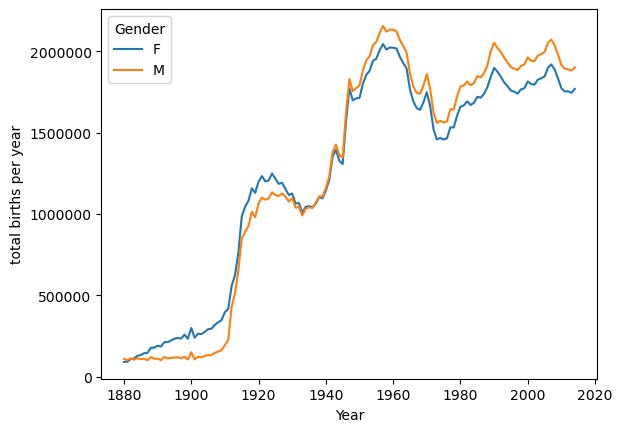

In [16]:
import matplotlib.pyplot as plt

boys_girls_count = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()

boys_girls_count.plot()

plt.xlabel('Year')
plt.ylabel('total births per year')
plt.ticklabel_format(style='plain')

### 20) Підрахуйте кількість гендерно-нейтральних імен (однакових для дівчат та хлопців)

In [17]:
name_gender_df = df.groupby(['Name', 'Gender'])['Count'].sum().unstack()
len(name_gender_df[(name_gender_df['F'].notna()) & (name_gender_df['M'].notna())])

10221

### 21) Порахуйте, скільки разів хлопчиків називали Barbara

In [18]:
df[(df['Name'] == 'Barbara') & (df['Gender'] == 'M')]['Count'].sum()

4139

### 23) Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року)

In [19]:
male_names = df[df['Gender'] == 'M'].groupby(['Name'])['Count'].sum()
female_names = df[df['Gender'] == 'F'].groupby(['Name'])['Count'].sum()
gender_neutral_names = male_names.index.intersection(female_names.index)
df1 = df[df['Name'].isin(gender_neutral_names)]
num_of_years = len(df['Year'].unique())
names_years = df1.groupby('Name')['Year'].nunique()
names_max_years = names_years[names_years == num_of_years].index
df2 = df1[df1['Name'].isin(names_max_years)]
df2.groupby('Name')['Count'].sum().sort_values(ascending=False)

Name
James      5129096
John       5106590
Robert     4816785
Michael    4330805
Mary       4130441
            ...   
Christ        3686
Nevada        3461
Price         3386
Levy          3116
Sena          2694
Name: Count, Length: 823, dtype: int64

### 25) Побудувати графіки розподілення кількості імен John та Mary по роках без залежності до статі.

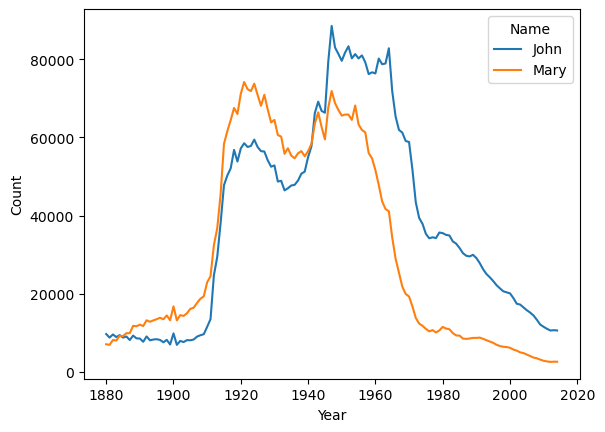

In [20]:
import matplotlib.pyplot as plt

john_data = df[(df['Name'] == 'John')]
mary_data = df[(df['Name'] == 'Mary')]

john = john_data.groupby('Year').aggregate({'Count': 'sum'})
mary = mary_data.groupby('Year').aggregate({'Count': 'sum'})

plt.plot(john.index, john['Count'], label='John')
plt.plot(mary.index, mary['Count'], label='Mary')

plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Name')

plt.show()

### 27) Знайти найпопулярніші імена в кожному році.

In [21]:
df1 = df.sort_values('Count', ascending=False)
df1.groupby('Year').aggregate({'Name': 'first', 'Count': 'first'})

,Name,Count
Year,,
1880,John,9655
1881,John,8769
1882,John,9557
1883,John,8894
1884,John,9388
...,...,...
2010,Isabella,22883
2011,Sophia,21816
2012,Sophia,22267
